## Earthquake tweets

In [17]:
from pyspark.sql import *

df = spark.read.option("header","true").csv("/home/user/datasets/mars_earthquake_tweets.csv")

In [18]:
df.printSchema()

root
 |-- date_time: string (nullable = true)
 |-- unix_time: string (nullable = true)
 |-- place: string (nullable = true)
 |-- filtr_text: string (nullable = true)
 |-- text: string (nullable = true)



In [19]:
df = df.dropna()

In [22]:
mars_data = df.orderBy('date_time').select('date_time', 'text')

In [23]:
data = mars_data.toPandas()

In [27]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [28]:
data.head()

,date_time,text
0,2018-02-23 16:26:09,mayb earthquak
1,2018-02-23 16:26:47,TSUNAMI 2011 (East Japan great earthquake disa...
2,2018-02-23 16:26:57,Magnitude 1.48 earthquake 8km E of Camp Pendle...
3,2018-02-23 16:27:00,2.1 #Earthquake in James Bay
4,2018-02-23 16:27:01,3.6 #Earthquake in 187 Km S From Clyde River


## USGS Data

In [29]:
from pandas import Series
from matplotlib import pyplot

In [32]:
series = Series.from_csv('/home/user/elicon/data/mars-earthquakes.csv1', header=0)

In [34]:
df = spark.read.option("header","true").csv('/home/user/elicon/data/mars-earthquakes.csv1')

In [35]:
df.printSchema()

root
 |-- time: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- depth: string (nullable = true)
 |-- mag: string (nullable = true)
 |-- magType: string (nullable = true)
 |-- nst: string (nullable = true)
 |-- gap: string (nullable = true)
 |-- dmin: string (nullable = true)
 |-- rms: string (nullable = true)
 |-- net: string (nullable = true)
 |-- id: string (nullable = true)
 |-- updated: string (nullable = true)
 |-- place: string (nullable = true)
 |-- type: string (nullable = true)
 |-- horizontalError: string (nullable = true)
 |-- depthError: string (nullable = true)
 |-- magError: string (nullable = true)
 |-- magNst: string (nullable = true)
 |-- status: string (nullable = true)
 |-- locationSource: string (nullable = true)
 |-- magSource: string (nullable = true)



In [36]:
df = df.dropna()

In [37]:
mars_data = df.orderBy('time').select('time', 'mag')

In [38]:
mars_data.show()

+--------------------+----+
|                time| mag|
+--------------------+----+
|2018-03-02T15:25:...|3.06|
|2018-03-02T16:55:...|2.52|
|2018-03-02T20:22:...|2.48|
|2018-03-03T07:00:...|2.58|
|2018-03-03T11:04:...|2.76|
|2018-03-05T13:54:...|2.74|
|2018-03-05T22:19:...|2.59|
|2018-03-06T12:44:...|2.56|
|2018-03-06T17:41:...|2.51|
|2018-03-06T22:21:...| 2.8|
|2018-03-07T04:26:...|2.53|
|2018-03-08T08:08:...|3.22|
|2018-03-09T04:21:...|2.48|
|2018-03-09T05:11:...|2.69|
|2018-03-10T01:21:...|2.87|
|2018-03-10T15:25:...|2.69|
|2018-03-11T09:42:...|2.84|
|2018-03-11T12:35:...|2.69|
|2018-03-11T12:45:...|3.56|
|2018-03-11T18:09:...|3.42|
+--------------------+----+
only showing top 20 rows



In [39]:
mags_data = mars_data.toPandas()

In [43]:
mags_data.columns = ['time', 'mag']

In [48]:
mags_data.set_index('time', inplace=True)

In [50]:
mags_data = mags_data.astype(float)

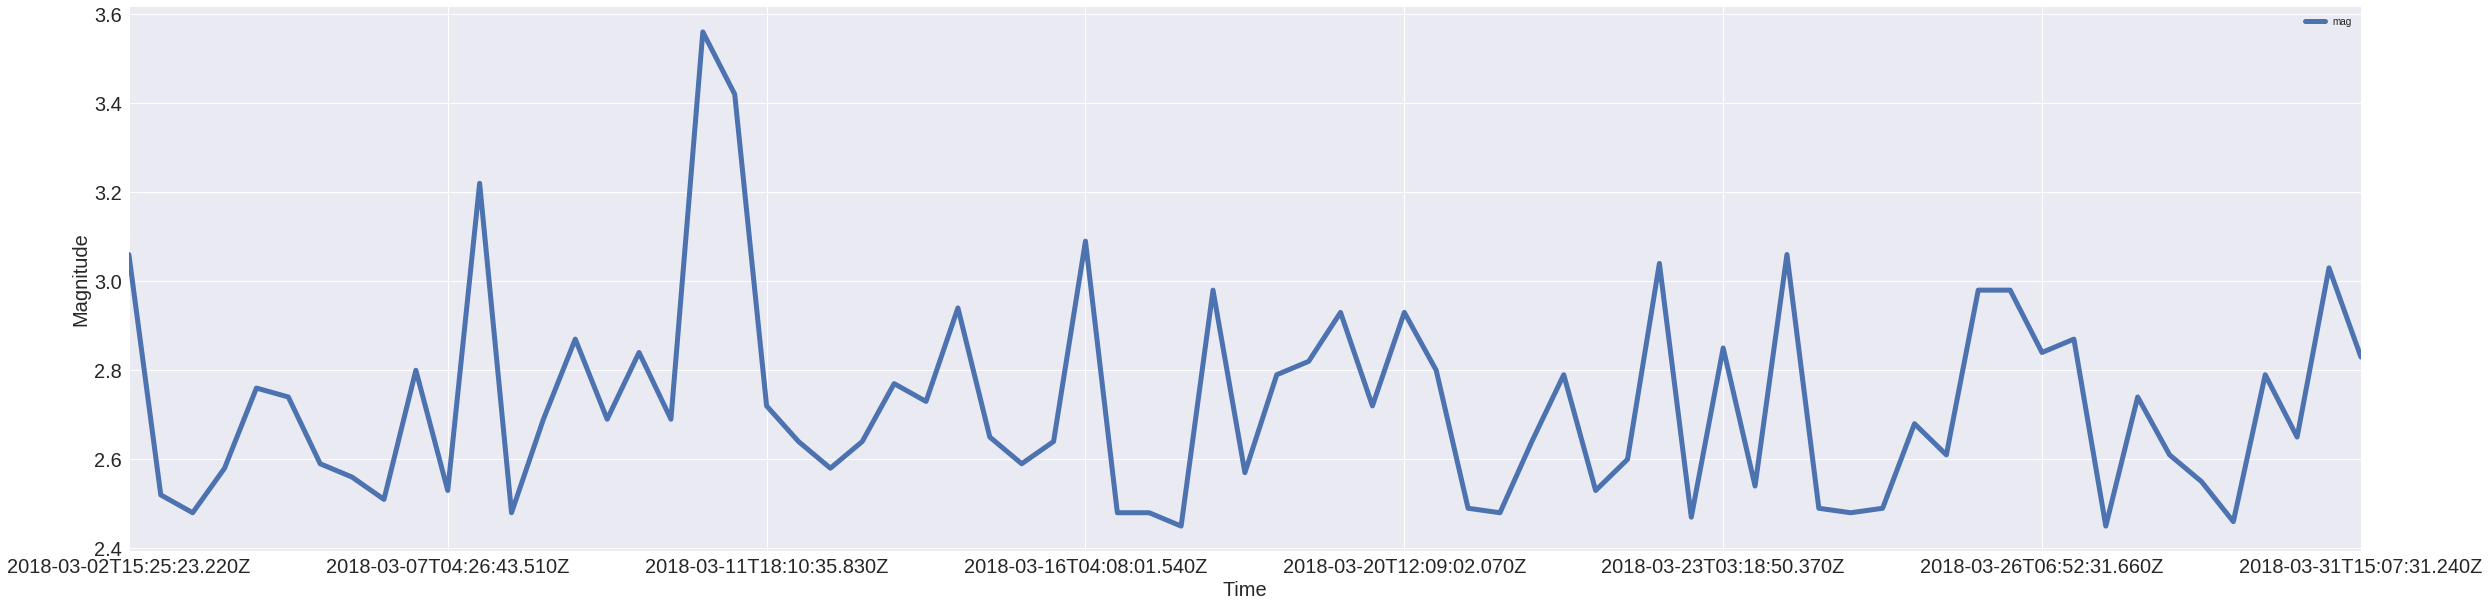

In [55]:
mags_data.plot(figsize=(40,10), linewidth=5, fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Magnitude', fontsize=20)